#**Importing** **Basic** **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the csv file

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#DATA CLEANING

#Checking the total sum on null values present




In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

#Detecting and removing the outlier person_emp_length = 123



In [8]:
df[df['person_emp_length']==123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [9]:
df1 = df.drop(labels=[0,210], axis=0)

In [10]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [11]:
df1['person_emp_length'].median()

4.0

#Filling the missing value of person_emp_length with the median of that column



In [12]:
df1['person_emp_length'].fillna(int(df['person_emp_length'].median()), inplace=True)

In [13]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#**Separating the data according to the loan_grade**

#dfA consists of the data where loan_grade is A




In [14]:
dfA = df1[df1['loan_grade']=='A']

In [15]:
dfA.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 1003
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
dfA['loan_int_rate'].mean()

7.327731505167299

filling the missing values(loan_int_rate) with the mean of that column 

#filling the missing values of loan_grade column in dfA by mean  

In [17]:

dfA1 = dfA.fillna(dfA['loan_int_rate'].mean())
dfA1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.900000,1,0.42,N,2
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.630000,1,0.45,N,2
12,23,95000,RENT,2.0,VENTURE,A,35000,7.900000,1,0.37,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.900000,0,0.30,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32567,53,85000,RENT,2.0,PERSONAL,A,8000,7.740000,0,0.09,N,26
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,7.327732,0,0.13,N,23
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.490000,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.170000,0,0.08,N,19


In [18]:
dfA1['loan_int_rate'].mean()

7.327731505167298

In [19]:
dfA1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
dfB = df1[df1['loan_grade']=='B']
dfB

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [21]:
dfB.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 1056
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [22]:
dfB['loan_int_rate'].mean()

10.99555508249069

In [23]:
dfB1 = dfB.fillna(dfB['loan_int_rate'].mean())
dfB1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [24]:
dfB1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [25]:
dfB1['loan_int_rate'].mean()

10.995555082490686

In [26]:
dfC = df1[df1['loan_grade']=='C']
dfC

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
25,24,67746,RENT,8.0,HOMEIMPROVEMENT,C,33000,12.68,1,0.49,N,3
29,21,11389,OTHER,5.0,EDUCATION,C,4000,12.84,1,0.35,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32564,53,45000,RENT,0.0,PERSONAL,C,5600,13.79,0,0.12,N,28
32566,52,30000,RENT,6.0,VENTURE,C,5000,12.73,0,0.17,N,18
32568,60,49008,OWN,5.0,PERSONAL,C,12000,13.79,0,0.24,Y,21


In [27]:
dfC.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length               0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 630
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [28]:
dfC['loan_int_rate'].mean()

13.46354152367879

In [29]:
dfC1 = dfC.fillna(dfC['loan_int_rate'].mean())
dfC1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.870000,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.230000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.270000,1,0.55,Y,4
25,24,67746,RENT,8.0,HOMEIMPROVEMENT,C,33000,12.680000,1,0.49,N,3
29,21,11389,OTHER,5.0,EDUCATION,C,4000,12.840000,1,0.35,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32553,54,20000,RENT,2.0,MEDICAL,C,5000,13.463542,0,0.25,N,28
32564,53,45000,RENT,0.0,PERSONAL,C,5600,13.790000,0,0.12,N,28
32566,52,30000,RENT,6.0,VENTURE,C,5000,12.730000,0,0.17,N,18
32568,60,49008,OWN,5.0,PERSONAL,C,12000,13.790000,0,0.24,Y,21


In [30]:
dfC1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [31]:
dfC1['loan_int_rate'].mean()

13.463541523678792

In [32]:
dfD = df1[df1['loan_grade']=='D']
dfD

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
18,23,113000,RENT,8.0,DEBTCONSOLIDATION,D,35000,18.25,1,0.31,N,4
22,22,65000,RENT,4.0,EDUCATION,D,34000,17.58,1,0.52,N,4
24,22,80000,RENT,3.0,PERSONAL,D,33950,14.54,1,0.42,Y,4
37,24,64000,RENT,8.0,DEBTCONSOLIDATION,D,30000,14.54,1,0.47,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32517,55,28800,OWN,1.0,PERSONAL,D,5000,15.33,0,0.17,N,22
32527,69,120000,MORTGAGE,3.0,PERSONAL,D,20000,14.84,0,0.17,N,27
32541,52,163000,MORTGAGE,9.0,PERSONAL,D,25000,14.11,1,0.15,N,30
32554,60,98000,RENT,1.0,HOMEIMPROVEMENT,D,15000,16.29,1,0.15,N,29


In [33]:
dfD.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length               0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 312
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [34]:
dfD['loan_int_rate'].mean()

15.36124962269846

In [35]:
dfD1 = dfD.fillna(dfD['loan_int_rate'].mean())
dfD1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
18,23,113000,RENT,8.0,DEBTCONSOLIDATION,D,35000,18.25,1,0.31,N,4
22,22,65000,RENT,4.0,EDUCATION,D,34000,17.58,1,0.52,N,4
24,22,80000,RENT,3.0,PERSONAL,D,33950,14.54,1,0.42,Y,4
37,24,64000,RENT,8.0,DEBTCONSOLIDATION,D,30000,14.54,1,0.47,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32517,55,28800,OWN,1.0,PERSONAL,D,5000,15.33,0,0.17,N,22
32527,69,120000,MORTGAGE,3.0,PERSONAL,D,20000,14.84,0,0.17,N,27
32541,52,163000,MORTGAGE,9.0,PERSONAL,D,25000,14.11,1,0.15,N,30
32554,60,98000,RENT,1.0,HOMEIMPROVEMENT,D,15000,16.29,1,0.15,N,29


In [36]:
dfD1['loan_int_rate'].mean()

15.361249622698463

In [37]:
dfD1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [38]:
dfE = df1[df1['loan_grade']=='E']
dfE

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
21,25,137000,RENT,9.0,PERSONAL,E,34800,16.77,0,0.25,Y,2
26,21,11000,MORTGAGE,3.0,VENTURE,E,4575,17.74,1,0.42,Y,3
36,22,48000,RENT,1.0,EDUCATION,E,30000,18.39,1,0.63,N,2
40,26,62050,RENT,6.0,MEDICAL,E,30000,17.99,1,0.41,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32473,64,56000,RENT,0.0,DEBTCONSOLIDATION,E,10000,16.82,1,0.18,Y,18
32510,55,97243,MORTGAGE,10.0,PERSONAL,E,17000,NaN,0,0.17,N,30
32535,65,133000,MORTGAGE,2.0,DEBTCONSOLIDATION,E,18000,NaN,1,0.14,N,25
32559,51,58000,RENT,2.0,MEDICAL,E,1500,19.03,1,0.03,N,24


In [39]:
dfE.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                 83
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
dtype: int64

In [40]:
dfE['loan_int_rate'].mean()

17.009455164585695

In [41]:
dfE1 = dfE.fillna(dfE['loan_int_rate'].mean())
dfE1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13,26,108160,RENT,4.0,EDUCATION,E,35000,18.390000,1,0.32,N,4
21,25,137000,RENT,9.0,PERSONAL,E,34800,16.770000,0,0.25,Y,2
26,21,11000,MORTGAGE,3.0,VENTURE,E,4575,17.740000,1,0.42,Y,3
36,22,48000,RENT,1.0,EDUCATION,E,30000,18.390000,1,0.63,N,2
40,26,62050,RENT,6.0,MEDICAL,E,30000,17.990000,1,0.41,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32473,64,56000,RENT,0.0,DEBTCONSOLIDATION,E,10000,16.820000,1,0.18,Y,18
32510,55,97243,MORTGAGE,10.0,PERSONAL,E,17000,17.009455,0,0.17,N,30
32535,65,133000,MORTGAGE,2.0,DEBTCONSOLIDATION,E,18000,17.009455,1,0.14,N,25
32559,51,58000,RENT,2.0,MEDICAL,E,1500,19.030000,1,0.03,N,24


In [42]:
dfE1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [43]:
dfE1['loan_int_rate'].mean()

17.009455164585695

In [44]:
dfF = df1[df1['loan_grade']=='F']
dfF

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
43,23,300000,OWN,1.0,EDUCATION,F,24250,19.41,0,0.08,Y,2
51,23,78000,RENT,7.0,DEBTCONSOLIDATION,F,30000,18.62,1,0.38,Y,3
123,25,225000,MORTGAGE,0.0,VENTURE,F,25000,18.67,0,0.11,N,2
151,26,48000,RENT,5.0,VENTURE,F,25000,18.43,1,0.52,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32054,50,19200,RENT,2.0,DEBTCONSOLIDATION,F,4000,NaN,1,0.21,N,11
32295,42,101000,MORTGAGE,6.0,DEBTCONSOLIDATION,F,25000,16.15,1,0.25,Y,14
32296,40,52000,RENT,2.0,EDUCATION,F,15000,18.62,1,0.29,Y,16
32330,51,80000,RENT,3.0,VENTURE,F,18000,18.78,0,0.23,N,19


In [45]:
dfF['loan_int_rate'].mean()

18.609158878504672

In [46]:
dfF.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                 27
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
dtype: int64

In [47]:
dfF1 = dfF.fillna(dfF['loan_int_rate'].mean())
dfF1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.250000,1,0.32,N,4
43,23,300000,OWN,1.0,EDUCATION,F,24250,19.410000,0,0.08,Y,2
51,23,78000,RENT,7.0,DEBTCONSOLIDATION,F,30000,18.620000,1,0.38,Y,3
123,25,225000,MORTGAGE,0.0,VENTURE,F,25000,18.670000,0,0.11,N,2
151,26,48000,RENT,5.0,VENTURE,F,25000,18.430000,1,0.52,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32054,50,19200,RENT,2.0,DEBTCONSOLIDATION,F,4000,18.609159,1,0.21,N,11
32295,42,101000,MORTGAGE,6.0,DEBTCONSOLIDATION,F,25000,16.150000,1,0.25,Y,14
32296,40,52000,RENT,2.0,EDUCATION,F,15000,18.620000,1,0.29,Y,16
32330,51,80000,RENT,3.0,VENTURE,F,18000,18.780000,0,0.23,N,19


In [48]:
dfF1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [49]:
dfF1['loan_int_rate'].mean()

18.609158878504672

In [50]:
dfG = df1[df1['loan_grade']=='G']
dfG

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.03,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.16,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.03,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.11,1,0.31,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,RENT,14.0,MEDICAL,G,20000,20.40,1,0.45,N,11
30730,36,56900,MORTGAGE,16.0,VENTURE,G,6200,NaN,1,0.11,N,11
31853,42,153000,MORTGAGE,7.0,EDUCATION,G,25000,20.53,1,0.16,N,14
31990,36,56900,MORTGAGE,16.0,MEDICAL,G,6200,NaN,1,0.11,N,13


In [51]:
dfG.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 5
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [52]:
dfG1 = dfG.fillna(dfG['loan_int_rate'].mean())
dfG1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.030000,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.160000,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.030000,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.210000,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.110000,1,0.31,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,RENT,14.0,MEDICAL,G,20000,20.400000,1,0.45,N,11
30730,36,56900,MORTGAGE,16.0,VENTURE,G,6200,20.251525,1,0.11,N,11
31853,42,153000,MORTGAGE,7.0,EDUCATION,G,25000,20.530000,1,0.16,N,14
31990,36,56900,MORTGAGE,16.0,MEDICAL,G,6200,20.251525,1,0.11,N,13


In [53]:
dfG1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [54]:
dfG1['loan_int_rate'].mean()

20.251525423728815

#Merging all the different dataframes into one dataframe(df2)


In [55]:
pdList = [dfA1, dfB1, dfC1, dfD1, dfE1, dfF1, dfG1]
df2 = pd.concat(pdList)
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.900000,1,0.42,N,2
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.630000,1,0.45,N,2
12,23,95000,RENT,2.0,VENTURE,A,35000,7.900000,1,0.37,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.900000,0,0.30,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,RENT,14.0,MEDICAL,G,20000,20.400000,1,0.45,N,11
30730,36,56900,MORTGAGE,16.0,VENTURE,G,6200,20.251525,1,0.11,N,11
31853,42,153000,MORTGAGE,7.0,EDUCATION,G,25000,20.530000,1,0.16,N,14
31990,36,56900,MORTGAGE,16.0,MEDICAL,G,6200,20.251525,1,0.11,N,13


In [56]:
df2.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32579,32579,32579,32579
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16445,6453,10776,26835


In [57]:
df2['person_home_ownership'].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'OTHER'], dtype=object)

In [58]:
df2['loan_intent'].unique()

array(['VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT', 'EDUCATION',
       'DEBTCONSOLIDATION', 'MEDICAL'], dtype=object)

In [59]:
df2['loan_grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [60]:
df2['cb_person_cred_hist_length'].unique()

array([ 2,  4,  3,  8,  6,  9,  5, 10,  7, 11, 16, 13, 17, 12, 14, 15, 23,
       26, 20, 30, 25, 24, 19, 28, 29, 27, 18, 21, 22])

#Converting the categorical variables using pandas dummies




In [61]:
ownership_dummies = pd.get_dummies(df2.person_home_ownership)
ownership_dummies

,MORTGAGE,OTHER,OWN,RENT
5,0,0,1,0
8,0,0,0,1
11,0,0,1,0
12,0,0,0,1
14,0,0,0,1
...,...,...,...,...
29305,0,0,0,1
30730,1,0,0,0
31853,1,0,0,0
31990,1,0,0,0


In [62]:
loanintent_dummies = pd.get_dummies(df2.loan_intent)
loanintent_dummies

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
5,0,0,0,0,0,1
8,0,0,0,0,1,0
11,0,0,1,0,0,0
12,0,0,0,0,0,1
14,0,1,0,0,0,0
...,...,...,...,...,...,...
29305,0,0,0,1,0,0
30730,0,0,0,0,0,1
31853,0,1,0,0,0,0
31990,0,0,0,1,0,0


In [63]:
loangrade_dummies = pd.get_dummies(df2.loan_grade)
loangrade_dummies

,A,B,C,D,E,F,G
5,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0
11,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0
14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
29305,0,0,0,0,0,0,1
30730,0,0,0,0,0,0,1
31853,0,0,0,0,0,0,1
31990,0,0,0,0,0,0,1


In [64]:
df3 = pd.concat([df2,ownership_dummies,loanintent_dummies,loangrade_dummies],axis='columns')
df3

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,MEDICAL,PERSONAL,VENTURE,A,B,C,D,E,F,G
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,...,0,0,1,1,0,0,0,0,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.900000,1,0.42,...,0,1,0,1,0,0,0,0,0,0
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.630000,1,0.45,...,0,0,0,1,0,0,0,0,0,0
12,23,95000,RENT,2.0,VENTURE,A,35000,7.900000,1,0.37,...,0,0,1,1,0,0,0,0,0,0
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.900000,0,0.30,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,RENT,14.0,MEDICAL,G,20000,20.400000,1,0.45,...,1,0,0,0,0,0,0,0,0,1
30730,36,56900,MORTGAGE,16.0,VENTURE,G,6200,20.251525,1,0.11,...,0,0,1,0,0,0,0,0,0,1
31853,42,153000,MORTGAGE,7.0,EDUCATION,G,25000,20.530000,1,0.16,...,0,0,0,0,0,0,0,0,0,1
31990,36,56900,MORTGAGE,16.0,MEDICAL,G,6200,20.251525,1,0.11,...,1,0,0,0,0,0,0,0,0,1


In [65]:
df4 = df3.drop(['person_home_ownership','RENT','loan_intent','VENTURE','loan_grade','G'], axis='columns')
df4

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,A,B,C,D,E,F
5,21,9900,2.0,2500,7.140000,1,0.25,N,2,0,...,0,0,0,0,1,0,0,0,0,0
8,24,83000,8.0,35000,8.900000,1,0.42,N,2,0,...,0,0,0,1,1,0,0,0,0,0
11,21,10000,2.0,4500,8.630000,1,0.45,N,2,0,...,0,1,0,0,1,0,0,0,0,0
12,23,95000,2.0,35000,7.900000,1,0.37,N,2,0,...,0,0,0,0,1,0,0,0,0,0
14,23,115000,2.0,35000,7.900000,0,0.30,N,4,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,14.0,20000,20.400000,1,0.45,N,11,0,...,0,0,1,0,0,0,0,0,0,0
30730,36,56900,16.0,6200,20.251525,1,0.11,N,11,1,...,0,0,0,0,0,0,0,0,0,0
31853,42,153000,7.0,25000,20.530000,1,0.16,N,14,1,...,1,0,0,0,0,0,0,0,0,0
31990,36,56900,16.0,6200,20.251525,1,0.11,N,13,1,...,0,0,1,0,0,0,0,0,0,0


In [66]:
df4['cb_person_default_on_file'].value_counts()

N    26835
Y     5744
Name: cb_person_default_on_file, dtype: int64

In [67]:
cleanup_nums = {'cb_person_default_on_file': {'N': 0, 'Y': 1}}

In [68]:
df5 = df4.replace(cleanup_nums)
df5

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,...,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,A,B,C,D,E,F
5,21,9900,2.0,2500,7.140000,1,0.25,0,2,0,...,0,0,0,0,1,0,0,0,0,0
8,24,83000,8.0,35000,8.900000,1,0.42,0,2,0,...,0,0,0,1,1,0,0,0,0,0
11,21,10000,2.0,4500,8.630000,1,0.45,0,2,0,...,0,1,0,0,1,0,0,0,0,0
12,23,95000,2.0,35000,7.900000,1,0.37,0,2,0,...,0,0,0,0,1,0,0,0,0,0
14,23,115000,2.0,35000,7.900000,0,0.30,0,4,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,14.0,20000,20.400000,1,0.45,0,11,0,...,0,0,1,0,0,0,0,0,0,0
30730,36,56900,16.0,6200,20.251525,1,0.11,0,11,1,...,0,0,0,0,0,0,0,0,0,0
31853,42,153000,7.0,25000,20.530000,1,0.16,0,14,1,...,1,0,0,0,0,0,0,0,0,0
31990,36,56900,16.0,6200,20.251525,1,0.11,0,13,1,...,0,0,1,0,0,0,0,0,0,0


#EXPLORATORY DATA ANALYSIS

#Getting the count of default and non-default loan status

In [69]:
(df5['loan_status'].value_counts()/len(df5))*100


0    78.185334
1    21.814666
Name: loan_status, dtype: float64

In [70]:
import plotly.express as ex
ex.pie(df5,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

In [71]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.33)

In [72]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.33)

#Using heatmap to find out the correlation



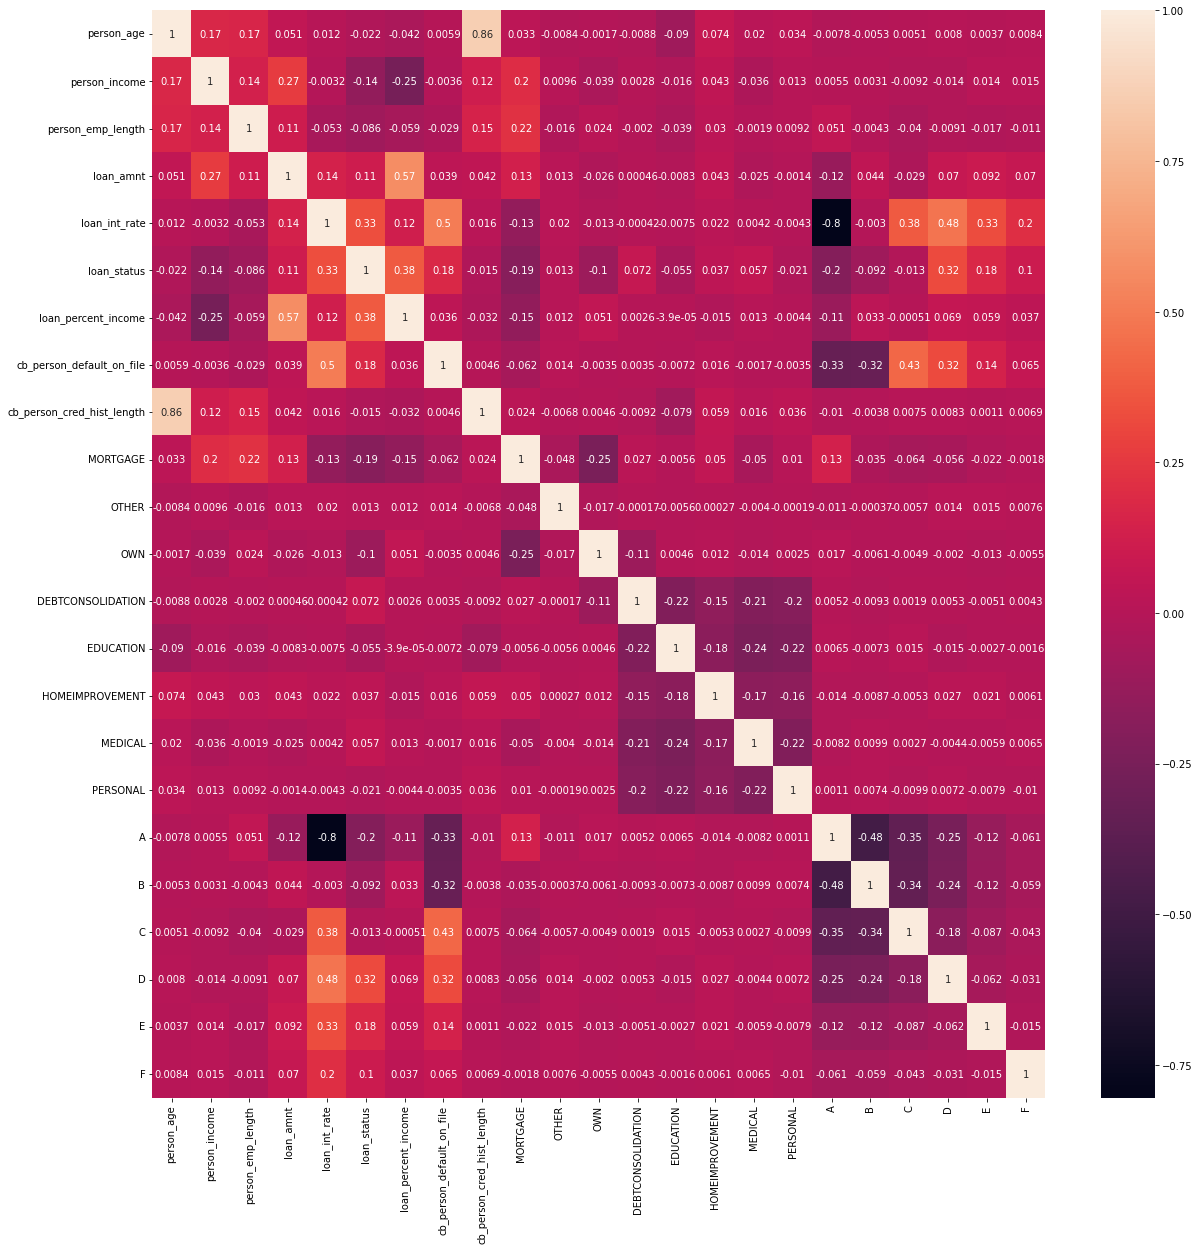

In [73]:
correlations = df5.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

#observation from the heatmap:
person_age and cb_person_cred_hist_length are high


loan_int_rate and loan_grade(A) are inversely proportional

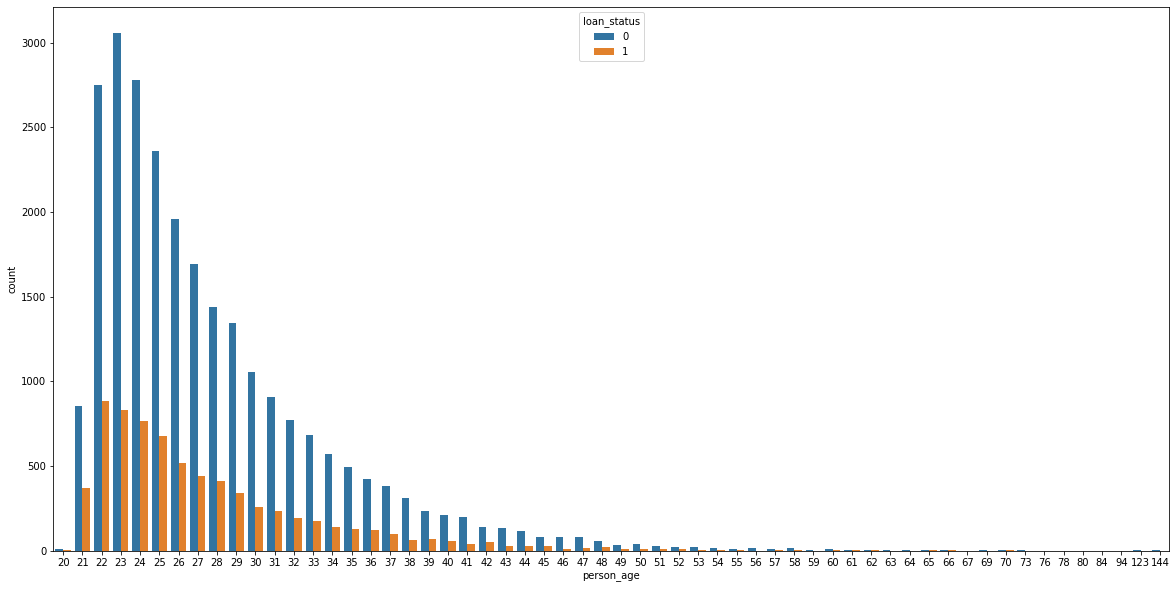

In [74]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'person_age', hue= 'loan_status', data=df5);

#observation from above graph: 
loan default is highly done by people with less age(Youngsters)

#Dividing the dataframe(df5) into independent (X) and dependent(Y) variables

In [75]:
X = df5.drop(['loan_status'],axis='columns')
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,...,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,A,B,C,D,E,F
5,21,9900,2.0,2500,7.140000,0.25,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
8,24,83000,8.0,35000,8.900000,0.42,0,2,0,0,...,0,0,0,1,1,0,0,0,0,0
11,21,10000,2.0,4500,8.630000,0.45,0,2,0,0,...,0,1,0,0,1,0,0,0,0,0
12,23,95000,2.0,35000,7.900000,0.37,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
14,23,115000,2.0,35000,7.900000,0.30,0,4,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,14.0,20000,20.400000,0.45,0,11,0,0,...,0,0,1,0,0,0,0,0,0,0
30730,36,56900,16.0,6200,20.251525,0.11,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
31853,42,153000,7.0,25000,20.530000,0.16,0,14,1,0,...,1,0,0,0,0,0,0,0,0,0
31990,36,56900,16.0,6200,20.251525,0.11,0,13,1,0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
Y = df5['loan_status']
Y

5        1
8        1
11       1
12       1
14       0
        ..
29305    1
30730    1
31853    1
31990    1
32071    1
Name: loan_status, Length: 32579, dtype: int64

In [78]:
import sklearn


#Doing the train test split with test size = 0.2

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [80]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,...,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,A,B,C,D,E,F
18939,28,29112,1.0,7000,6.990000,0.24,0,5,0,0,...,0,0,0,0,1,0,0,0,0,0
21774,32,50000,0.0,5400,7.140000,0.11,0,9,1,0,...,1,0,0,0,1,0,0,0,0,0
26484,34,103363,4.0,15000,10.995555,0.15,0,8,1,0,...,0,0,0,0,0,1,0,0,0,0
27876,34,397800,5.0,14000,14.610000,0.03,1,5,1,0,...,0,0,1,0,0,0,0,1,0,0
1777,22,19728,5.0,2000,7.490000,0.10,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,24,40000,1.0,7500,12.420000,0.19,0,4,1,0,...,0,0,1,0,0,1,0,0,0,0
16347,24,20400,3.0,7550,14.790000,0.37,1,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10520,26,52703,5.0,4000,11.890000,0.06,0,4,1,0,...,0,0,1,0,0,1,0,0,0,0
10571,26,63000,4.0,12000,15.270000,0.19,0,2,1,0,...,1,0,0,0,0,0,1,0,0,0


In [81]:
Y_train

18939    0
21774    0
26484    0
27876    1
1777     0
        ..
4068     0
16347    1
10520    1
10571    1
16946    0
Name: loan_status, Length: 26063, dtype: int64

#LOGISTIC REGRESSION

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [83]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500,1000]
    }
]

In [84]:
model.fit(X_train,Y_train)

LogisticRegression()

In [85]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.8050951503990178

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y_test)
print(cm)

[[5013 1185]
 [  85  233]]


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

In [ ]:
clf.fit(X_train,Y_train)

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 500, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
clf.best_estimator_

LogisticRegression(C=545.5594781168514, max_iter=500, penalty='l1',
                   solver='liblinear')

In [ ]:
y_prediction = clf.predict(X_test)

In [ ]:
accuracy_score(y_prediction,Y_test)

0.8717004297114794

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_prediction,Y_test)
print(cm)

[[4878  616]
 [ 220  802]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_prediction,Y_test))

NameError: ignored

#DECISION TREE


In [91]:
from sklearn.tree import DecisionTreeClassifier
credit_tree = DecisionTreeClassifier(criterion='entropy')
credit_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [92]:
predictions = credit_tree.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [93]:
accuracy_score(predictions,Y_test)

0.8967157765500307

In [94]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5041
           1       0.78      0.75      0.77      1475

    accuracy                           0.90      6516
   macro avg       0.86      0.85      0.85      6516
weighted avg       0.90      0.90      0.90      6516



#XGBOOST

In [95]:
import xgboost
classifier = xgboost.XGBClassifier()

In [96]:
classifier.fit(X_train,Y_train)

XGBClassifier()

In [97]:
pred = classifier.predict(X_test)

In [98]:
accuracy_score(pred,Y_test)

0.9315531000613874

In [99]:
cm = confusion_matrix(pred,Y_test)
print(cm)

[[5062  410]
 [  36 1008]]


In [100]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5472
           1       0.71      0.97      0.82      1044

    accuracy                           0.93      6516
   macro avg       0.85      0.95      0.89      6516
weighted avg       0.95      0.93      0.94      6516

